# Импорт библиотек и подготовка данных
 Здесь подключаем необходимые модули для численных вычислений, визуализации,
 а также наш модуль utils с функциями scatter_labels и plot_linear.
 Затем задаём тренировочный набор точек с метками 0/1.

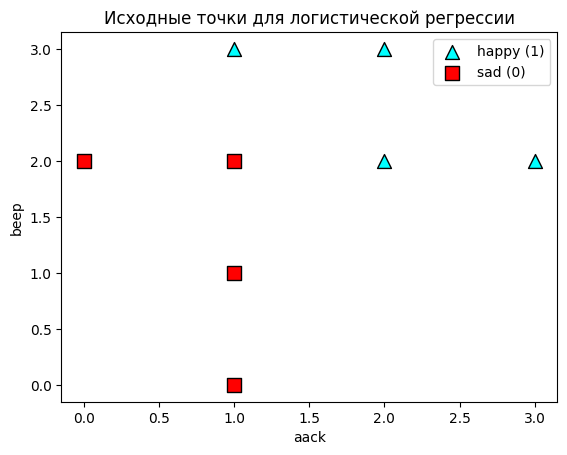

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import utils

# Генерируем или задаём фиксированный набор двумерных данных и меток
features = np.array([
    [1, 0], [0, 2], [1, 1], [1, 2],
    [1, 3], [2, 2], [3, 2], [2, 3]
])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Визуализируем исходные точки двух классов
utils.scatter_labels(features, labels)
plt.title('Исходные точки для логистической регрессии')
plt.show()



# Определение функций для логистической регрессии
 В этом блоке реализуем:
 1) sigmoid – функция активации;
 2) score     – взвешенная сумма признаков + bias;
 3) prediction– прогноз вероятности класса 1;
 4) log_loss  – логарифмическая функция потерь для одного примера;
 5) total_log_loss – суммарная потеря по всем примерам.
 Эти функции задают математическую основу логистической регрессии.

In [3]:
def sigmoid(x):
    """
    Сигмоидная функция: exp(x)/(1+exp(x)), устойчивее для больших отрицательных x.
    """
    return np.exp(x) / (1 + np.exp(x))


def score(weights, bias, feature_vector):
    """
    Линейная часть модели: w·x + bias.
    """
    return np.dot(weights, feature_vector) + bias


def prediction(weights, bias, feature_vector):
    """
    Вероятность класса 1: sigmoid(score).
    Возвращает число в (0,1).
    """
    return sigmoid(score(weights, bias, feature_vector))


def log_loss(weights, bias, feature_vector, true_label):
    """
    Логарифмическая потеря для одного примера:
      -label*log(p) - (1-label)*log(1-p)
    """
    p = prediction(weights, bias, feature_vector)
    # избегаем log(0)
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return -true_label * np.log(p) - (1 - true_label) * np.log(1 - p)


def total_log_loss(weights, bias, features, labels):
    """
    Суммарная лог-LOSS по всему набору (без усреднения).
    """
    return sum(log_loss(weights, bias, f, y) for f, y in zip(features, labels))



# Правило обновления для логистической регрессии
 Градиентный шаг по одному примеру (стохастический градиентный спуск):
   w <- w + lr*(label - p)*x
   b <- b + lr*(label - p)

In [4]:
def logistic_update(weights, bias, feature_vector, true_label, learning_rate=0.01):
    """
    Обновление параметров по одному примеру.
    """
    p = prediction(weights, bias, feature_vector)
    diff = true_label - p
    weights = weights + learning_rate * diff * feature_vector
    bias = bias + learning_rate * diff
    return weights, bias

# Основной алгоритм обучения логистической регрессии
 Здесь выполняем стохастический градиентный спуск:
 1. Инициализируем веса и bias;
 2. Для каждой эпохи: рисуем текущую разделяющую прямую, считаем суммарную потерю,
    обновляем параметры по одному случайному примеру;
 3. В конце визуализируем итоговую разделяющую линию и график потерь.


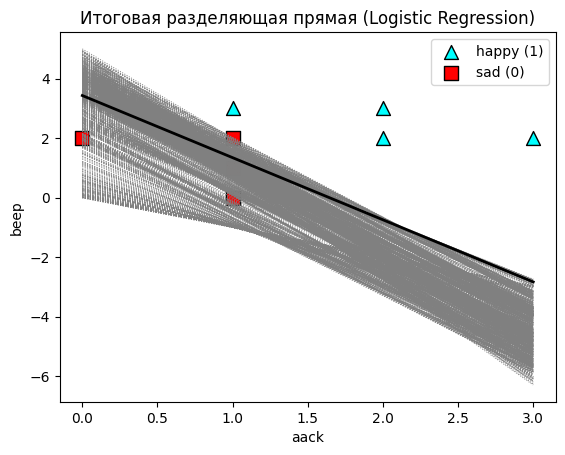

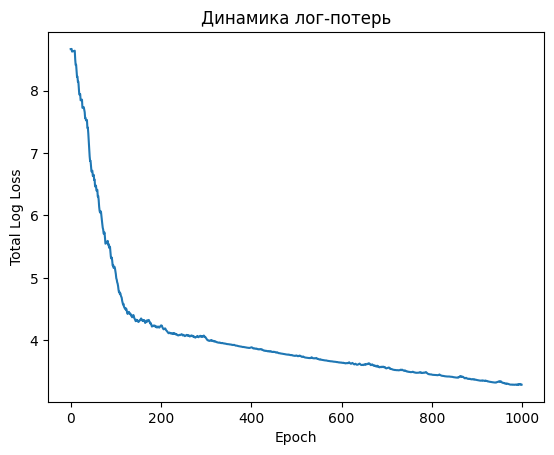

Обученные веса: [0.91886039 0.43972872]
Обученный bias: -1.5102467522610992


In [5]:
random.seed(0)
def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
    # инициализация
    weights = np.ones(features.shape[1])
    bias = 0.0
    loss_history = []

    # начальный график данных
    utils.scatter_labels(features, labels)

    for epoch in range(epochs):
        # рисуем текущую разделяющую прямую пунктиром
        utils.plot_linear(weights[0], weights[1], bias, color='grey', linewidth=0.7, linestyle='dotted')
        # вычисляем суммарную функцию потерь на всех примерах
        total_loss = total_log_loss(weights, bias, features, labels)
        loss_history.append(total_loss)
        # стохастический шаг: случайный пример
        idx = random.randrange(len(features))
        weights, bias = logistic_update(weights, bias, features[idx], labels[idx], learning_rate)

    # финальная разделяющая прямая
    utils.plot_linear(weights[0], weights[1], bias, color='black')
    plt.title('Итоговая разделяющая прямая (Logistic Regression)')
    plt.show()

    # график функции потерь по эпохам
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Total Log Loss')
    plt.title('Динамика лог-потерь')
    plt.show()

    return weights, bias

# Запуск обучения
final_weights, final_bias = logistic_regression_algorithm(features, labels)
print('Обученные веса:', final_weights)
print('Обученный bias:', final_bias)

# Табличный вывод итоговых параметров и данных
 Выводим DataFrame с признаками и метками, аналог tc.SFrame,
 а также коэффициенты модели в табличном виде.

In [6]:
import pandas as pd

# исходные данные
data_df = pd.DataFrame({'x1': features[:,0], 'x2': features[:,1], 'y': labels})
print(data_df)

# коэффициенты
coef_df = pd.DataFrame({
    'parameter': ['bias', 'w1', 'w2'],
    'value': [final_bias, final_weights[0], final_weights[1]]
})
print(coef_df)

   x1  x2  y
0   1   0  0
1   0   2  0
2   1   1  0
3   1   2  0
4   1   3  1
5   2   2  1
6   3   2  1
7   2   3  1
  parameter     value
0      bias -1.510247
1        w1  0.918860
2        w2  0.439729
